In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

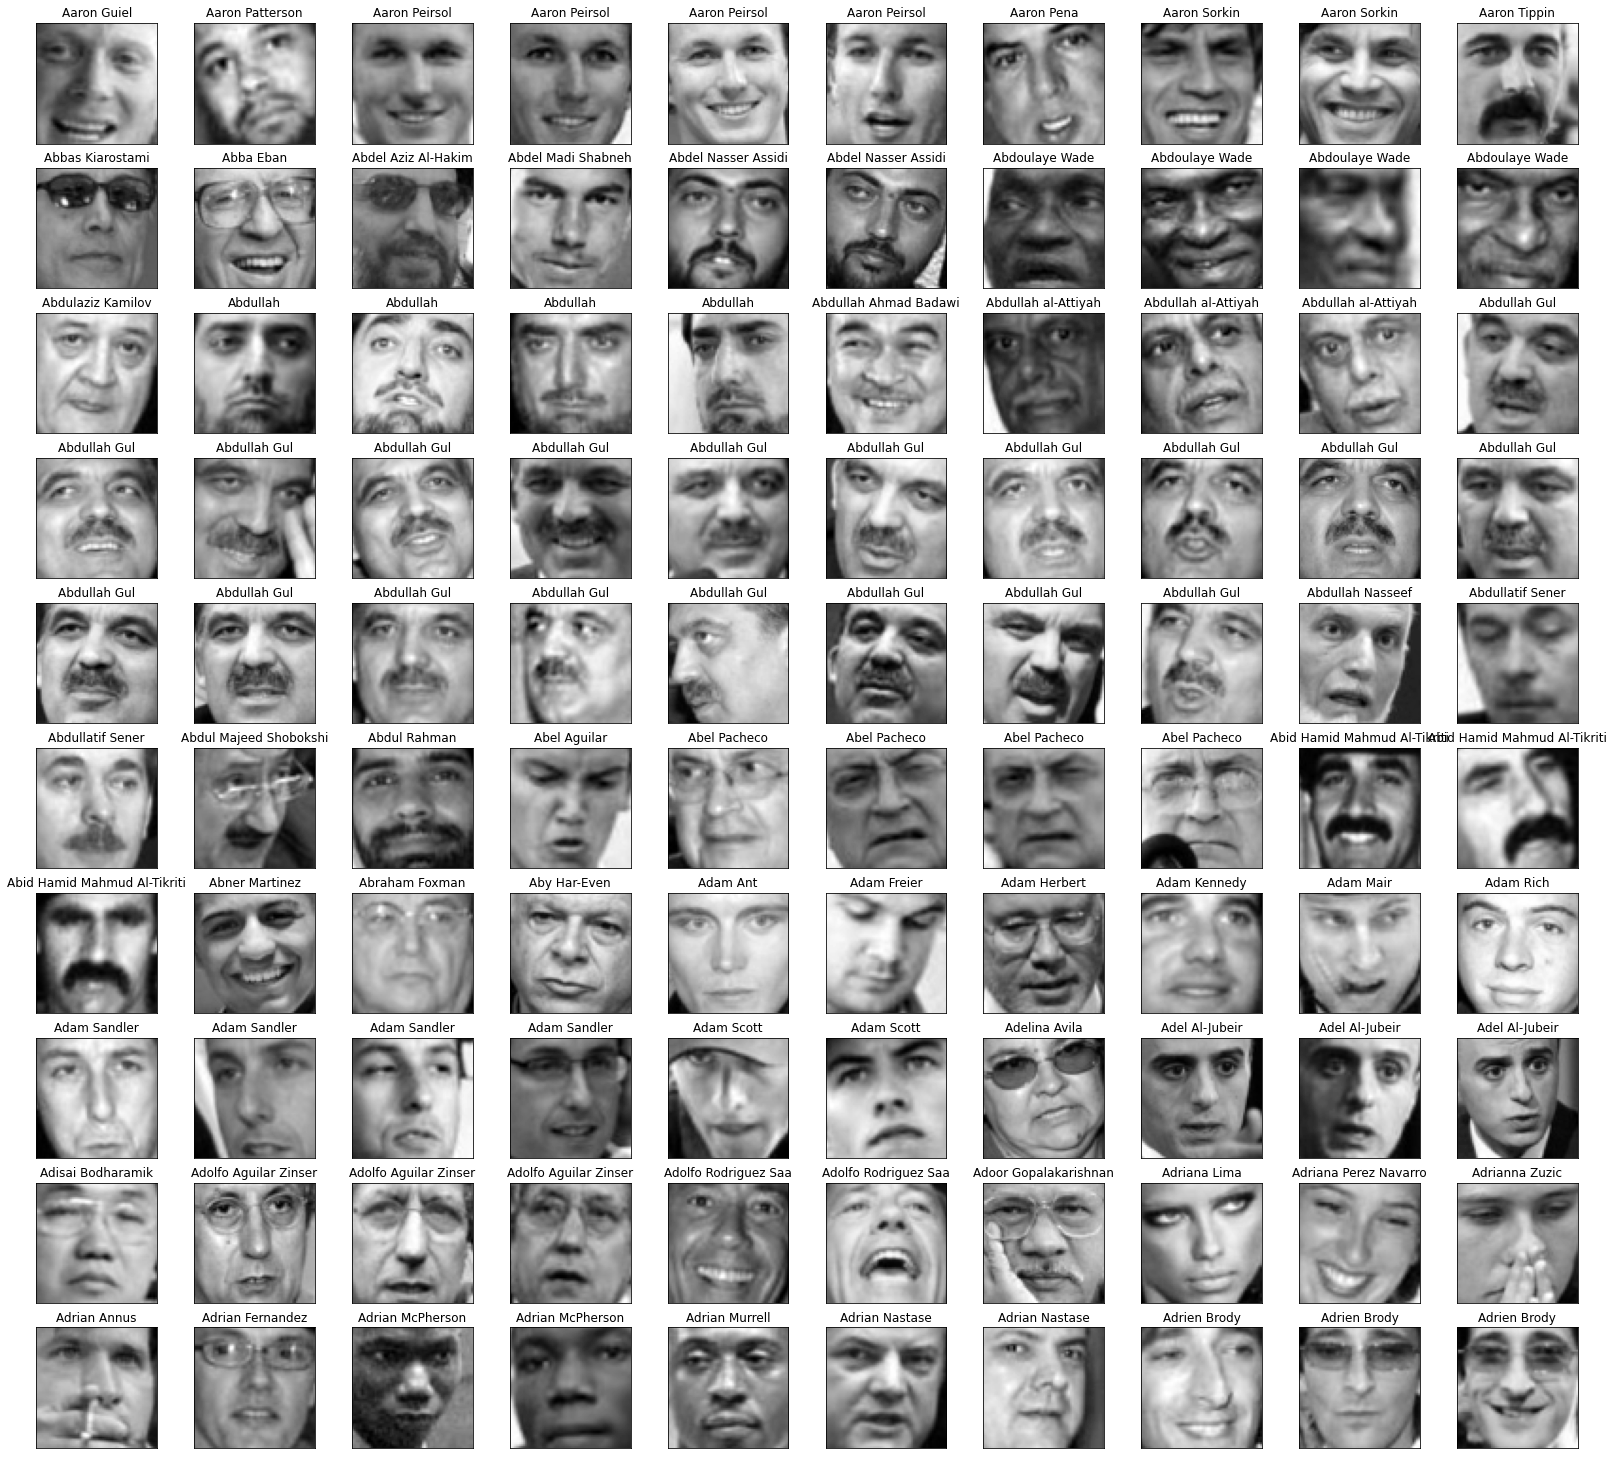

In [58]:
dir='lfwcrop_grey/faces'
celebrity_photos=os.listdir(dir)[1:1001]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape
plot_portraits(images, celebrity_names, h, w, n_row=10, n_col=10)

In [49]:
images.shape

(1000, 64, 64)

In [50]:
images[10]

array([[128., 125., 130., ...,  50.,  47.,  54.],
       [126., 125., 130., ...,  41.,  38.,  50.],
       [123., 124., 128., ...,  40.,  35.,  50.],
       ...,
       [ 94.,  98.,  99., ..., 102., 102., 102.],
       [ 89.,  94.,  95., ..., 102., 102., 102.],
       [ 83.,  87.,  89., ..., 102., 102., 102.]])

In [62]:
print(np.transpose(images[10]))

[[128. 126. 123. ...  94.  89.  83.]
 [125. 125. 124. ...  98.  94.  87.]
 [130. 130. 128. ...  99.  95.  89.]
 ...
 [ 50.  41.  40. ... 102. 102. 102.]
 [ 47.  38.  35. ... 102. 102. 102.]
 [ 54.  50.  50. ... 102. 102. 102.]]


In [52]:
images[10].shape

(64, 64)

In [53]:
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    components = V[:n_pc]
    projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

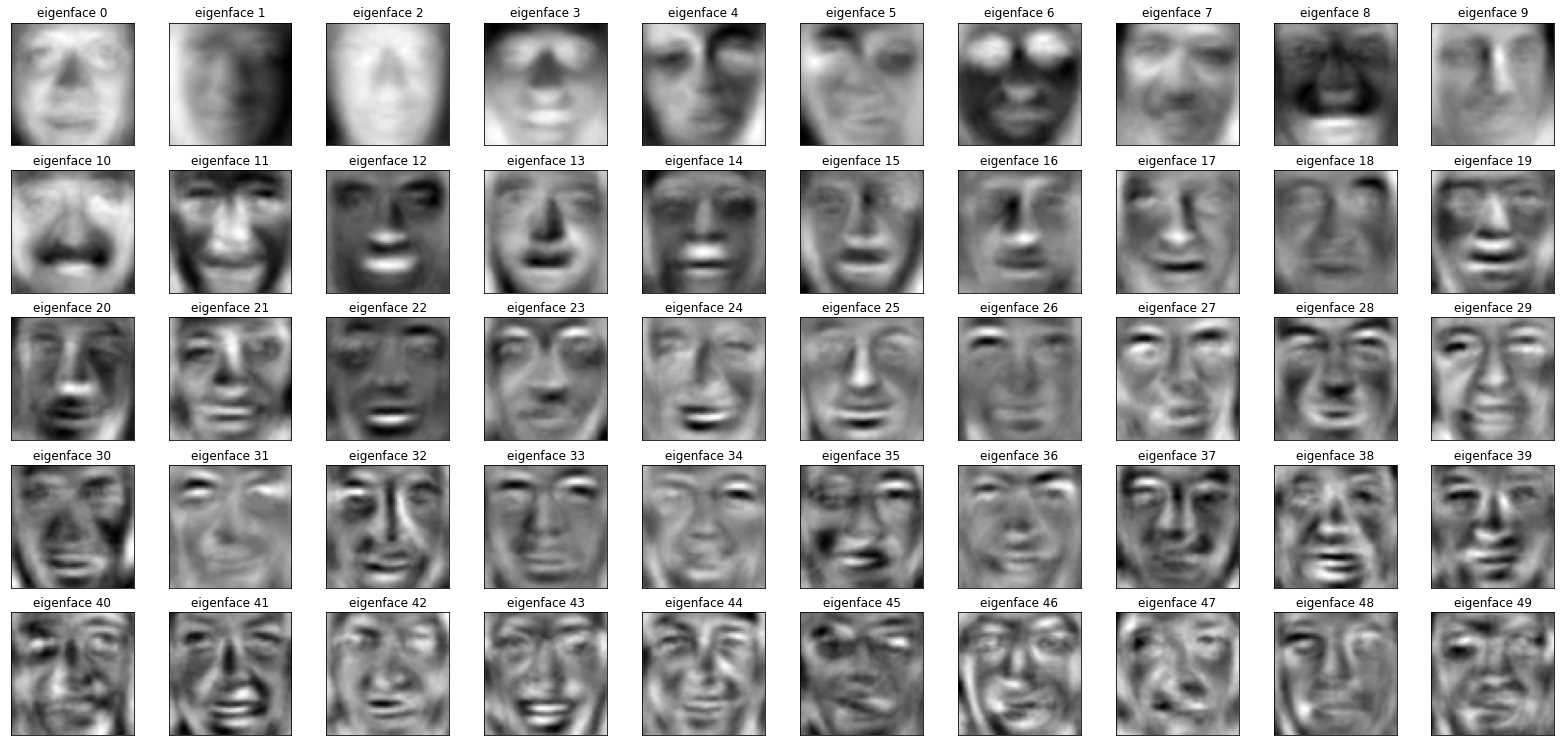

In [57]:
n_components = 50
X = images.reshape(n_samples, h*w)
P, C, M, Y= pca(X, n_pc=n_components)
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 5, 10) 

In [40]:
eigenfaces[10]

array([[-0.01277785, -0.01433331, -0.01594771, ..., -0.01851493,
        -0.01750671, -0.01704009],
       [-0.01287969, -0.01377386, -0.01500018, ..., -0.01875369,
        -0.01734032, -0.01626561],
       [-0.01199981, -0.01274769, -0.01437097, ..., -0.01922555,
        -0.0174601 , -0.01603581],
       ...,
       [-0.01948282, -0.02079871, -0.02301528, ..., -0.032201  ,
        -0.03439685, -0.0345296 ],
       [-0.02051708, -0.02126724, -0.0235535 , ..., -0.03180186,
        -0.03350725, -0.03357129],
       [-0.02123033, -0.02246065, -0.0244353 , ..., -0.03110809,
        -0.03249863, -0.03269144]])

In [55]:
eigenfaces.shape

(50, 64, 64)

In [41]:
eigenfaces[10].shape

(64, 64)

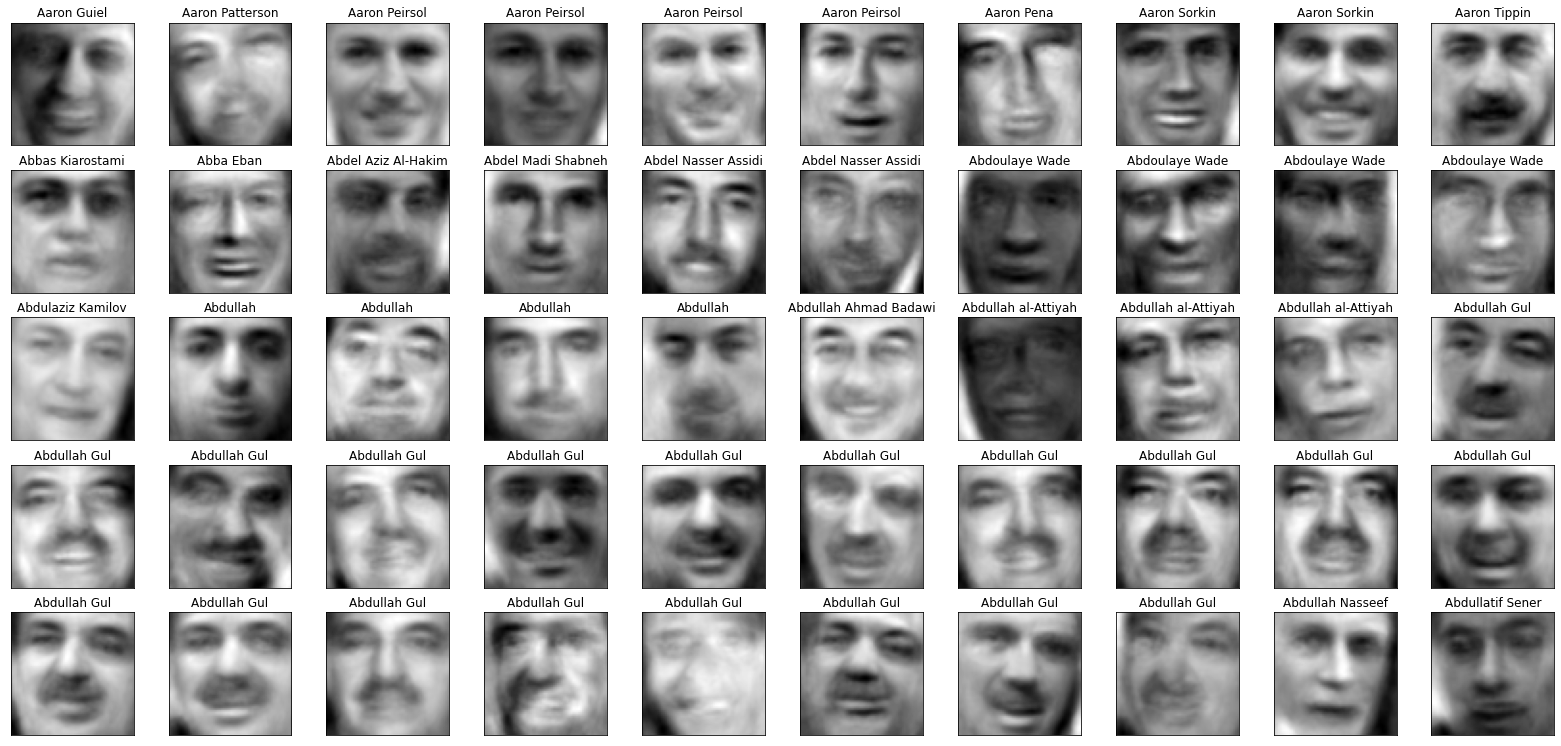

In [56]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, celebrity_names, h, w, n_row=5, n_col=10)